# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

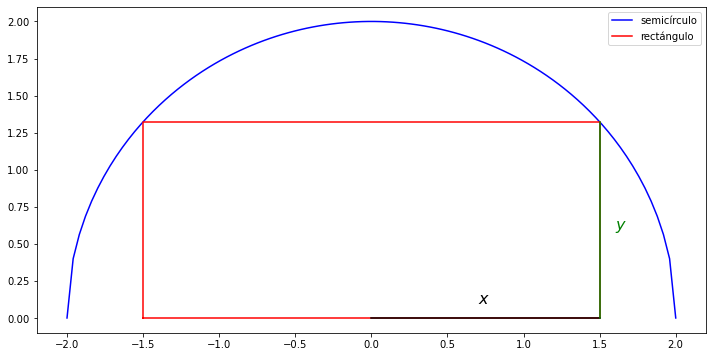

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario).

In [2]:
import pandas as pd
import scipy.optimize as opt

In [3]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

## Tercer punto. Regresión lineal.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3. Es decir:

$$ y_1 = \beta_0 + \beta_1 x $$
$$ y_2 = \beta_0 + \beta_1 x + \beta_2 x^2$$
$$ y_3 = \beta_0 + \beta_1 x + \beta_2 x^2 + + \beta_3 x^3 $$



Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar la suma de los errores al cuadrado (RSS) contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

## Cuarto punto. Regresión logística.

**Enunciado**. Ximena vive un poco alejada de la universidad donde estudia y quiere asegurarse de siempre llegar a tiempo. Ha estado registrando la hora a la que sale como minutos relativos a las 7 am. I.e. $x=25$ serían 25 minutos **después** de las 7 am, y $x=-15$ serían 15 minutos **antes** de las 7 am. Además, también registra si llega a tiempo o no. ¿Qué es lo más tarde que puede salir de su casa para tener 70% de probabilidad de llegar a tiempo?

